/Users/wriju/miniconda3/envs/cta/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp


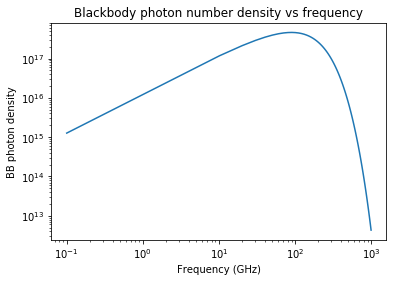

In [1]:
from astropy import units as u
import numpy as np
from astropy.constants import k_B, hbar, c
import matplotlib.pyplot as plt

%matplotlib inline

def _softphoton_dist(e, T):
        """ Blackbody spectrum : No. of photons / energy / cm3
        Parameters
        ----------
        e : 'astropy.units.Quantity' float
            energy of photon (in eV)

        T : 'astropy.units.Quantity' float
            Temperature of Blackbody (in Kelvin)
        """
        kT = (k_B * T).to('TeV')
        hc = hbar.to('TeV s') * c.cgs
        norm = 1 / ( (hc **3) * (np.pi ** 2) )
        num = e.to('TeV') ** 2
        denom = (np.exp(e / kT)).value - 1
        
        return (norm * (num / denom)).value
    
fr_low = 0.1 * u.GHz
en_low = fr_low.to('eV', equivalencies = u.spectral())
fr_hi = 1000 * u.GHz
en_hi = fr_hi.to('eV', equivalencies = u.spectral())

e_array = np.linspace(en_low, en_hi, 100)
f_array = np.linspace(fr_low, fr_hi, 100)
T = 2.7 * u.K

n_soft = []

for i, e in enumerate(e_array):
    n_soft.append(_softphoton_dist(e, T))

plt.loglog(f_array, n_soft)
plt.title('Blackbody photon number density vs frequency')
plt.xlabel('Frequency (GHz)')
plt.ylabel('BB photon density')
